In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from clones.data.experiments import Experiment

%matplotlib inline

### Load experiment

In [2]:
# load experiment
experiment = Experiment('../../../data/drosophila/')

### Load annotated data

Automatically assigned labels are stored under the `genotype` key while manual labels are stored under a `manual_label` key.

In [3]:
data = experiment.aggregate_measurements(selected_only=True, exclude_boundary=True)
#data = data[~data.manual_label.isna()]

### Compare fluorescence levels between clones

In [5]:
from clones.analysis.statistics import CloneComparison

def clones_figure(data, type1=0, type2=1, label='genotype'):
    
    # create figure/axes
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(4, 1.25))
    
    # plot clonal marker comparison
    prfp = CloneComparison(data, type1, type2, basis='r', label=label)
    prfp.plot(ax=ax0, ylabel='Clonal marker (a.u.)', cut=1)
    ax0.set_ylim(-0.1, 1.)
    #ax0.set_yticks(np.arange(0, 2.5+.1, .5))
    
    # plot PntGFP comparison
    pgfp = CloneComparison(data, type1, type2, basis='g', label=label)
    pgfp.plot(ax=ax1, ylabel='GFP (a.u.)', cut=1)
    ax1.set_ylim(-0.1, 0.6)
    #ax1.set_yticks(np.arange(0, 1.2+.1, .2))
    
    # plot PntGFP comparison
    pgfp = CloneComparison(data, type1, type2, basis='gc', label=label)
    pgfp.plot(ax=ax2, ylabel='Corrrected GFP (a.u.)', cut=1)
    ax2.set_ylim(-0.1, 0.6)
    #ax2.set_yticks(np.arange(0, 1.2+.1, .2))
    
    # enforce tight layout
    plt.tight_layout()
    
    return fig


In [14]:
metric = 'KS'
print('M vs H: raw', CloneComparison(data, 0, 1, basis='g').compare(metric))
print('M vs H: corrected', CloneComparison(data, 0, 1, basis='gc').compare(metric))
print('H vs W: raw', CloneComparison(data, 1, 2, basis='g').compare(metric))
print('H vs W: corrected', CloneComparison(data, 1, 2, basis='gc').compare(metric))

M vs H: raw 1.7144549119319927e-48
M vs H: corrected 0.07959950340116968
H vs W: raw 1.5280736633268645e-16
H vs W: corrected 0.17606502089113155


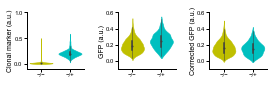

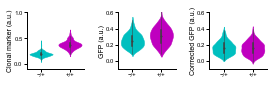

In [7]:
_ = clones_figure(data, type1=0, type2=1)
_ = clones_figure(data, type1=1, type2=2)